In [3]:
suppressMessages(library(meda))
suppressMessages(library(data.table))
load("../../synaptome-stats/Code/cleanDataWithAttributes.RData")

## First example 
A mixture of 5 univariate Gaussians:

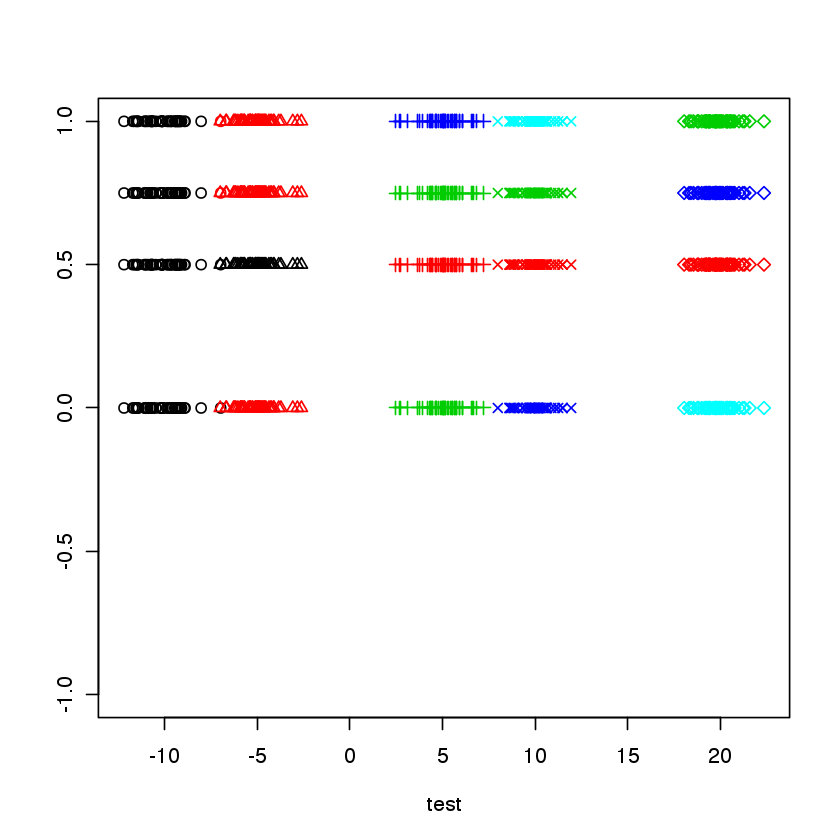

In [4]:
Z <- rep(1:5, each = 50)
mu <- c(-10,-5,5,10,20)
set.seed(391857)
test <- rnorm(length(Z), mean = mu[Z], sd = 1)
L <- hmc(test)
plot(cbind(test,0), col = Z, pch = Z)
for(i in 2:dim(L)[2]){
 points(cbind(test,i/dim(L)[2]), col=L[,i], pch = Z)
}


The truth with color is at y = 0, with the output hierarchy above.
Shapes denote true cluster.

## Second Example
A mixture of 5 bivariate Gaussians:

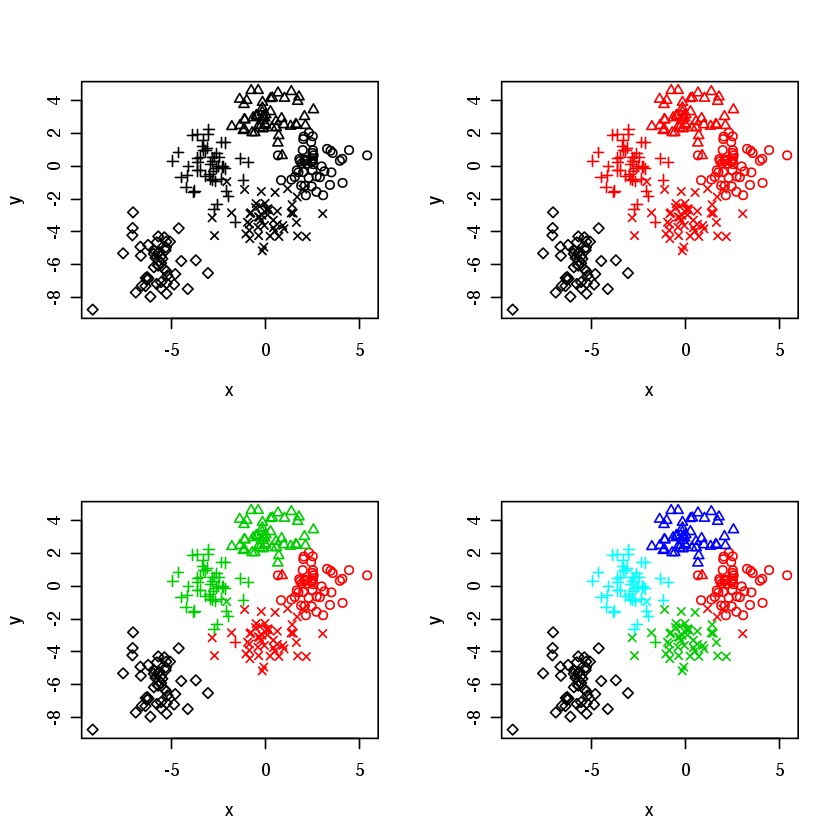

In [5]:
mu2d <- matrix(3*c(1,0,-1,0,-2,0,1,0,-1,-2), 5,2)
set.seed(1234)
test2d <- data.frame(
            x = rnorm(length(Z), mean = mu2d[Z,1], sd = 1),
            y = rnorm(length(Z), mean = mu2d[Z,2], sd = 1))
                                                            
L <- hmc(test2d)
par(mfrow = c(2,2))
plot(test2d, col = 1, pch = Z)
plot(test2d, col = L[, dim(L)[2]-2], pch = Z)
plot(test2d, col = L[, dim(L)[2]-1], pch = Z)
plot(test2d, col = L[, dim(L)[2]], pch = Z)

## Fisher's Iris data

In [13]:
dat <- iris[,-5]
labs <- hmc(dat)
kv <- kmeans(iris[,-5], centers = 3)
adjustedRandIndex(iris[, 5], kv$cluster)
adjustedRandIndex(iris[, 5], labs[, dim(labs)[2]])

[1] 0.7302383

[1] 0.9222414

ERROR: Error in plot.xy(xy, type, ...): invalid plotting symbol


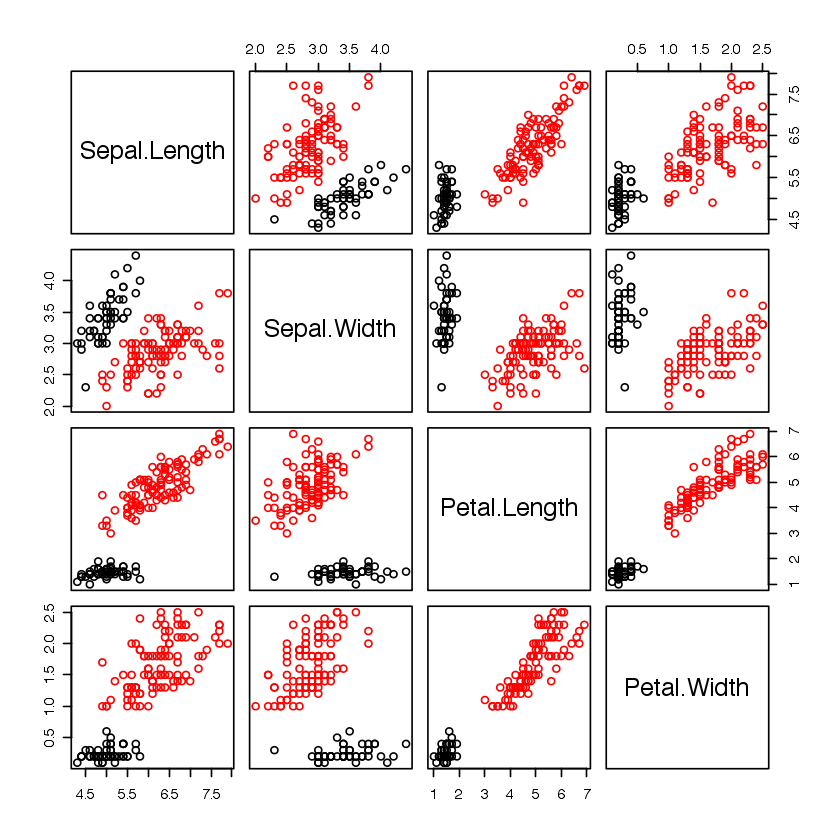

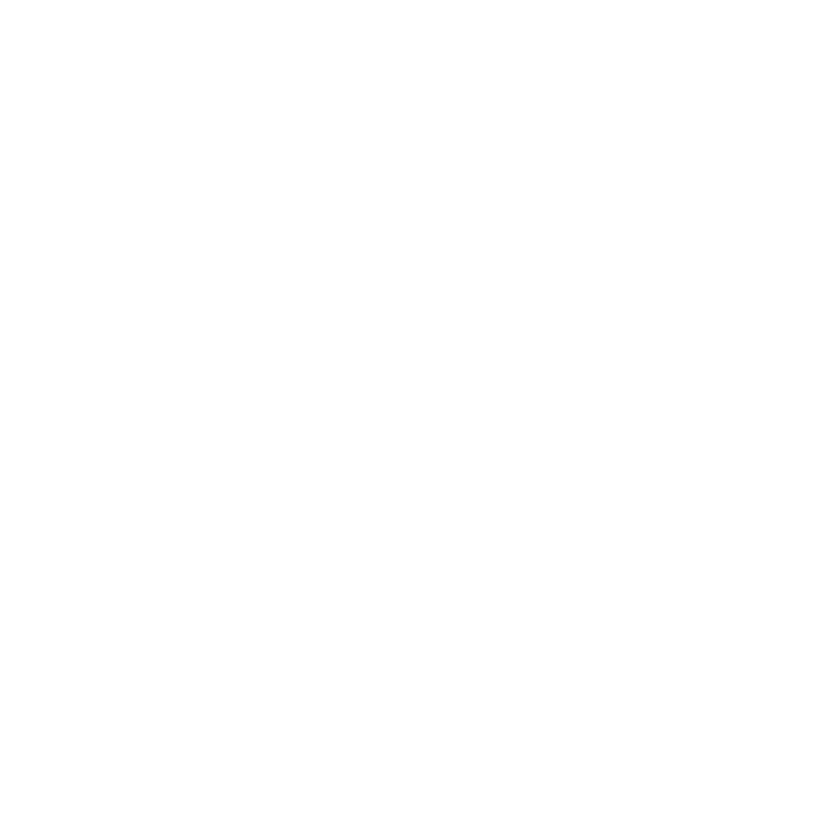

In [15]:
pairs(iris[,-5], col = labs[, dim(labs)[2]-1])
pairs(iris[,-5], col = labs[, dim(labs)[2]], pch = A.Nfactor(iris[, 5]))

## Synaptome Data
Here is a cursory run on a sample of 100 points from the synaptome dataset. 

In [24]:
set.seed(317)
s1 <- sample(dim(data01)[1], 1e4) 
s2 <- sample(dim(data01)[1], 1e2)
synDat <- data01[s2, 1:24, with = FALSE]

In [25]:
synL <- hmc(synDat)

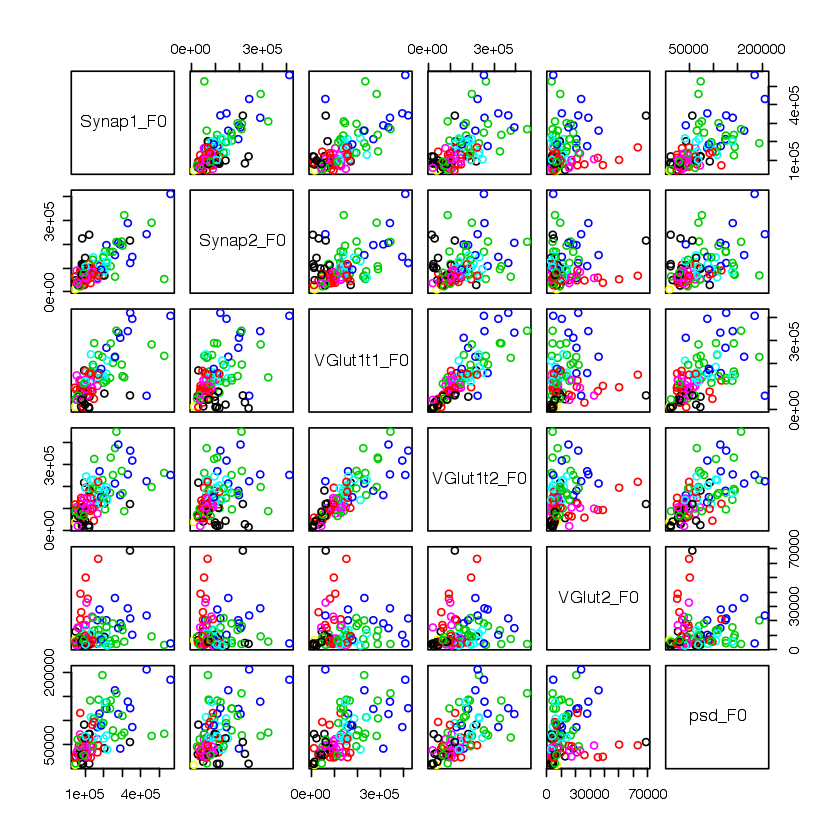

In [39]:
pairs(synDat[, 1:6, with = FALSE], col = synL[, dim(synL)[2]])